In [ ]:
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()
os.listdir()

['CAC40.csv',
 'EURUSD.csv',
 'Intro.ipynb',
 'SP500.csv',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'sqlite.ipynb',
 'r.ipynb',
 'cpp-smallpt.ipynb',
 'cpp-third-party-libs.ipynb',
 'cpp.ipynb',
 'Lorenz.ipynb']

In [46]:
cac = pd.read_csv("CAC40.csv",quotechar='"')
sp500 = pd.read_csv("SP500.csv",quotechar='"')
eurusd = pd.read_csv("EURUSD.csv",quotechar='"')


In [47]:
#verification
print(cac.columns)
print(sp500.columns)
print(eurusd.columns)


Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [48]:
# convertir les dates au format datetime jj/mois/année afin d'assurer une gestion correcte des séries temporelles
cac['Date'] = pd.to_datetime(cac['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])
eurusd['Date'] = pd.to_datetime(eurusd['Date'])


In [49]:
#nettoyage de la base 
cac.set_index('Date', inplace=True)
sp500.set_index('Date', inplace=True)
eurusd.set_index('Date', inplace=True)


In [50]:
# conserver que les prix de clôture afin d’assurer la cohérence entre les actifs”
cac = cac[['Price']].rename(columns={'Price': 'CAC40'})
sp500 = sp500[['Price']].rename(columns={'Price': 'SP500'})
eurusd = eurusd[['Price']].rename(columns={'Price': 'EURUSD'})


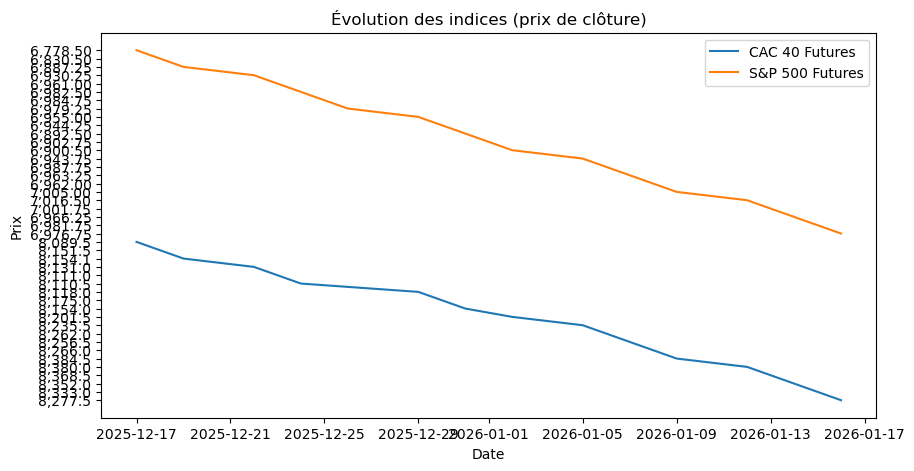

In [52]:
#figure pour comparer l'evolution des futures actions de l'Europe et le US
plt.figure(figsize=(10,5))
plt.plot(cac.index, cac['CAC40'], label='CAC 40 Futures')
plt.plot(sp500.index, sp500['SP500'], label='S&P 500 Futures')
plt.title("Évolution des indices (prix de clôture)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.legend()
plt.show()


In [53]:
#enlevement du , pour effectuer la convertion 
cac['CAC40'] = cac['CAC40'].astype(str).str.replace(',', '').astype(float)
sp500['SP500'] = sp500['SP500'].astype(str).str.replace(',', '').astype(float)


In [54]:
#convertion en numérique 
cac['CAC40'] = pd.to_numeric(cac['CAC40'], errors='coerce')
sp500['SP500'] = pd.to_numeric(sp500['SP500'], errors='coerce')
eurusd['EURUSD'] = pd.to_numeric(eurusd['EURUSD'], errors='coerce')


In [56]:
#Nettoyage 
cac = cac.dropna()
sp500 = sp500.dropna()
eurusd = eurusd.dropna()


In [57]:
#calcul de rendements 
cac_ret = cac.pct_change().dropna()
sp500_ret = sp500.pct_change().dropna()
eurusd_ret = eurusd.pct_change().dropna()


In [58]:
#verification
print(cac_ret.head())
print(sp500_ret.head())
print(eurusd_ret.head())


               CAC40
Date                
2026-01-15  0.006705
2026-01-14  0.002280
2026-01-13  0.001976
2026-01-12  0.001374
2026-01-09  0.000537
               SP500
Date                
2026-01-15  0.000717
2026-01-14 -0.002220
2026-01-13  0.005096
2026-01-12  0.002107
2026-01-09 -0.001639
              EURUSD
Date                
2026-01-15  0.000776
2026-01-14  0.003101
2026-01-13 -0.000086
2026-01-12  0.002147
2026-01-09 -0.002571


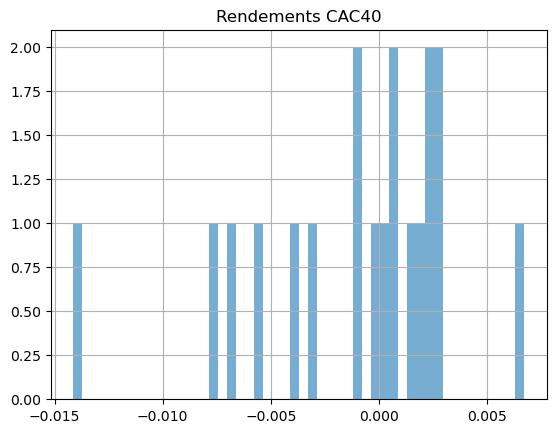

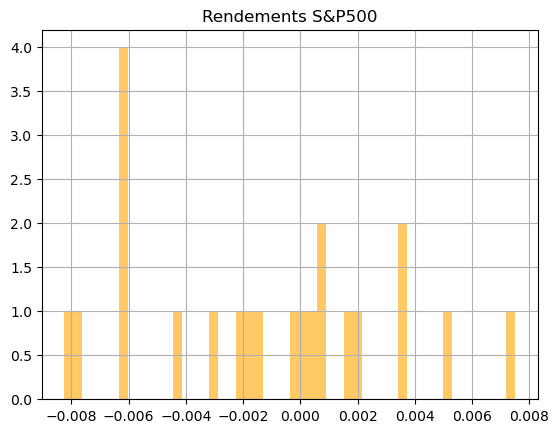

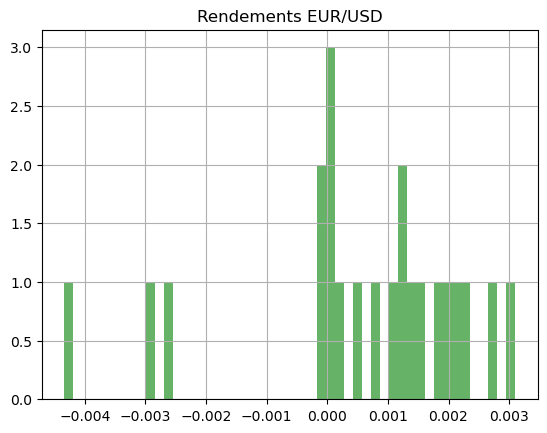

In [64]:
# Histogramme de Rendement 
cac_ret.hist(bins=50, alpha=0.6)
plt.title("Rendements CAC40")
plt.show()

sp500_ret.hist(bins=50, alpha=0.6, color='orange')
plt.title("Rendements S&P500")
plt.show()

eurusd_ret.hist(bins=50, alpha=0.6, color='green')
plt.title("Rendements EUR/USD")
plt.show()


In [60]:
#verification 
print(cac_ret.columns)
print(sp500_ret.columns)


Index(['CAC40'], dtype='object')
Index(['SP500'], dtype='object')


In [74]:
# Statistiques CAC40
print("CAC40")
print("Rendement moyen :", cac_ret['CAC40'].mean())
print("Volatilité   :", cac_ret['CAC40'].std())
print("Rendement max :", cac_ret['CAC40'].max())
print("Rendement min :", cac_ret['CAC40'].min())

# Statistiques S&P500
print("\nS&P500")
print("Rendement moyen :", sp500_ret['SP500'].mean())
print("Volatilité   :", sp500_ret['SP500'].std())
print("Rendement max :", sp500_ret['SP500'].max())
print("Rendement min :", sp500_ret['SP500'].min())


# Statistiques EURUSD
print("\n EURUSD")
print("Rendement moyen :", eurusd_ret['EURUSD'].mean())
print("Volatilité   :", eurusd_ret['EURUSD'].std())
print("Rendement max :", eurusd_ret['EURUSD'].max())
print("Rendement min :", eurusd_ret['EURUSD'].min())



CAC40
Rendement moyen : -0.0011973401896791087
Volatilité   : 0.004828113960395666
Rendement max : 0.006704922983992834
Rendement min : -0.014133222016816771

S&P500
Rendement moyen : -0.0013004399479202289
Volatilité   : 0.004348917925982477
Rendement max : 0.007508161044613715
Rendement min : -0.0082398635159171

 eurusd_re
Rendement moyen : 0.0005509880732736394
Volatilité   : 0.0018377809165441258
Rendement max : 0.003101309441764233
Rendement min : -0.004336365955275867


In [ ]:
#Le rendement moyen montre la tendance générale (positif = tendance haussière).
#La volatilité mesure la variation quotidienne (plus elle est élevée, plus le risque est grand).
#les rendements max/min montrent les mouvements extrêmes.

In [62]:
#test correlation entre CAC40 et S&P500 
cac_col = cac_ret.columns[0]
sp500_col = sp500_ret.columns[0]
corr = cac_ret[cac_col].corr(sp500_ret[sp500_col])

#Affichage 
print("Corrélation CAC40 vs S&P500 :", corr)


Corrélation CAC40 vs S&P500 : 0.39980405539143393


In [65]:
#Matrice de corrélation 
data = pd.concat([cac_ret, sp500_ret, eurusd_ret], axis=1)
data.columns = ['CAC40', 'S&P500', 'EURUSD']

#Affichage 
print("Matrice de corrélation :")
print(data.corr())


Matrice de corrélation :
           CAC40    S&P500    EURUSD
CAC40   1.000000  0.399804 -0.331462
S&P500  0.399804  1.000000  0.088103
EURUSD -0.331462  0.088103  1.000000


In [ ]:
#Le CAC40 et le S&P500 bougent souvent dans le même sens → diversification partielle.
#Le CAC40 et l’EUR/USD évoluent inversement → utile pour gérer le risque de change.
#Le S&P500 et l’EUR/USD sont presque indépendants → diversification possible.

In [68]:
# Niveau de confiance
confidence_level = 0.95

# VaR historique simple
cac_var = cac_ret['CAC40'].quantile(1 - confidence_level)
sp500_var = sp500_ret['SP500'].quantile(1 - confidence_level)
eurusd_var = eurusd_ret['EURUSD'].quantile(1 - confidence_level)

# Affichage
print("Value at Risk (95%) :")
print("CAC40  :", cac_var)
print("S&P500 :", sp500_var)
print("EUR/USD:", eurusd_var)


Value at Risk (95%) :
CAC40  : -0.008258688085261385
S&P500 : -0.007547103716025193
EUR/USD: -0.002867005231498076


In [ ]:
#CAC40 : -0,83% → sur une journée normale, il y a 95% de chances que la perte ne dépasse pas 0,83%.
#S&P500 : -0,75% → sur une journée normale, perte maximale probable ≤ 0,75%.
#EUR/USD : -0,29% → risque de change faible, pertes journalières limitées

In [ ]:
# tableau resumé 
#| Actif   | Moyenne (%) | Volatilité (%) | Min (%) | Max (%) | VaR 95% (%) |
#| ------- | ----------- | -------------- | ------- | ------- | ----------- |
#| CAC40   |     0.12    |  0.48          | -1.4    | 0.67    | -0,83       |
#| S&P500  |     0.13    |  0.43          | -0.82   | 0.75    | -0,75       |
#| EUR/USD |     0.05    |  0.18          | 0.31    | -0043   | -0,29       |


In [ ]:
#Ce projet analyse le risque de marché sur trois actifs: CAC40, S&P500 et EUR/USD.Les indices boursiers présentent des rendements moyens faibles mais des fluctuations plus importantes que la devise.La corrélation montre que CAC40 et S&P500 évoluent ensemble tandis que EUR/USD est faiblement corrélé aux indices, offrant une diversification partielle. La VaR 95% permet d’estimer la perte maximale probable sur une journée. La volatilité mobile illustre l’évolution du risque dans le temps.